In [42]:
import keras
import numpy as np

In [144]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten
from keras import activations,optimizers 

In [72]:
from keras.datasets import fashion_mnist

In [73]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [74]:
x_train.shape

(60000, 28, 28)

In [75]:
import matplotlib.pyplot as plt
import keras.utils

In [76]:
img1=x_train[19]

In [77]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)

In [78]:
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [79]:
y_test=y_test.reshape(y_test.shape[0],1)
y_train=y_train.reshape(y_train.shape[0],1)

In [80]:
from sklearn.preprocessing import OneHotEncoder

In [81]:
encoder=OneHotEncoder()

In [82]:
y_train=encoder.fit_transform(y_train)

In [83]:
y_test=encoder.transform(y_test)

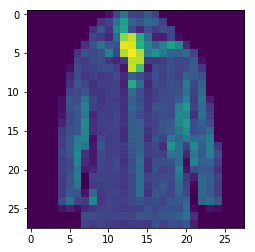

In [84]:
plt.imshow(img1)

In [208]:
x_train1=x_train[:10000]
y_train1=y_train[:10000]
x_test1=x_test[:1000]
y_test1=y_test[:1000]
y_train1=y_train1.todense()

In [220]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [221]:
op=optimizers.Adam(lr=0.0001)
model.compile(optimizer=op,loss='categorical_crossentropy',metrics=['accuracy'])

In [230]:
model.fit(x_train1,y_train1,batch_size=10,epochs=10,validation_data=(x_test1,y_test1))

Train on 10000 samples, validate on 1000 samples
Epoch 1/10
10000/10000 [==============================] - 9s 910us/step - loss: 0.2291 - acc: 0.9175 - val_loss: 0.5728 - val_acc: 0.8600
Epoch 2/10
10000/10000 [==============================] - 9s 924us/step - loss: 0.1913 - acc: 0.9315 - val_loss: 0.5314 - val_acc: 0.8710
Epoch 3/10
10000/10000 [==============================] - 9s 923us/step - loss: 0.1733 - acc: 0.9351 - val_loss: 0.5632 - val_acc: 0.8730
Epoch 4/10
10000/10000 [==============================] - 9s 928us/step - loss: 0.1675 - acc: 0.9421 - val_loss: 0.5247 - val_acc: 0.8750
Epoch 5/10
10000/10000 [==============================] - 9s 927us/step - loss: 0.1541 - acc: 0.9429 - val_loss: 0.5855 - val_acc: 0.8770
Epoch 6/10
10000/10000 [==============================] - 10s 971us/step - loss: 0.1398 - acc: 0.9500 - val_loss: 0.5929 - val_acc: 0.8660
Epoch 7/10
10000/10000 [==============================] - 9s 928us/step - loss: 0.1363 - acc: 0.9507 - val_loss: 0.6665 - 

In [231]:
ypred=model.predict(x_test)

In [232]:
ypred=np.argmax(ypred,axis=-1)

In [233]:
ytests1=np.argmax(y_test,axis=-1)

In [234]:
ytests1=np.array(ytests1)
ytests1=ytests1.reshape(ytests1.shape[0])

In [235]:
(ypred==ytests1).sum()

8728